**Problem Statement** - The aim is to predict the amout of profit made by the various statups based on there expense made and based on the states they operate.

In [82]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [46]:
#importing the dataset
dataset = pd.read_csv('/content/Startups_Profits.csv')

In [47]:
len(dataset)

50

In [48]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
# Defines the no of instances and features
dataset.shape 

(50, 5)

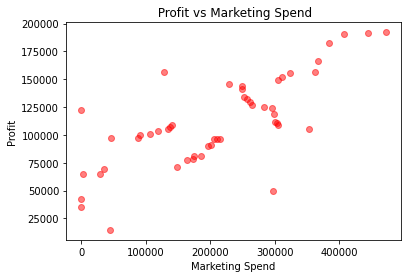

In [79]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5,color='red')
plt.title(' Profit vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

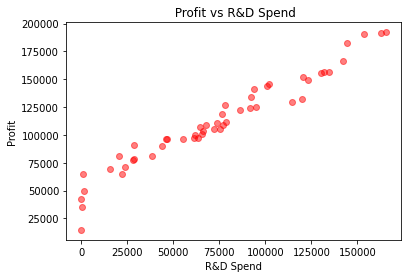

In [80]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5,color='red')
plt.title(' Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

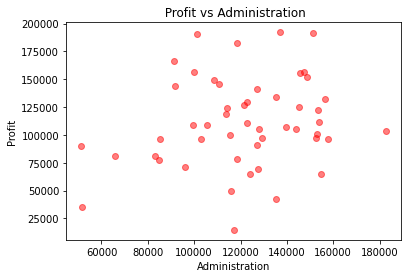

In [81]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5,color='red')
plt.title(' Profit vs Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

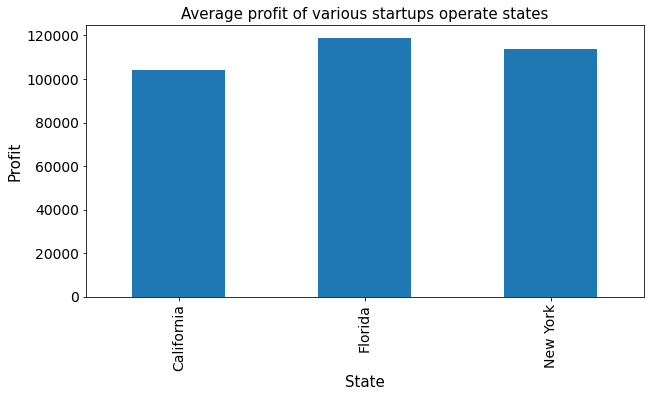

In [53]:
# Create the figure object 
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit of various startups operate states", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [54]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [55]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)
# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [56]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [57]:
dependent_variable = 'Profit'


In [58]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [59]:
independent_variables

['Marketing Spend',
 'NewYork_State',
 'Administration',
 'Florida_State',
 'California_State',
 'R&D Spend']

In [60]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [61]:
dataset[independent_variables].head()

,Marketing Spend,NewYork_State,Administration,Florida_State,California_State,R&D Spend
0,471784.10,1,136897.80,0,0,165349.20
1,443898.53,0,151377.59,0,1,162597.70
2,407934.54,0,101145.55,1,0,153441.51
3,383199.62,1,118671.85,0,0,144372.41
4,366168.42,0,91391.77,1,0,142107.34


In [62]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [63]:
X_train[0:5]

array([[2.1463481e+05, 0.0000000e+00, 1.0305749e+05, 1.0000000e+00,
        0.0000000e+00, 5.5493950e+04],
       [2.0551764e+05, 1.0000000e+00, 8.5047440e+04, 0.0000000e+00,
        0.0000000e+00, 4.6014020e+04],
       [1.3405007e+05, 0.0000000e+00, 1.4413598e+05, 1.0000000e+00,
        0.0000000e+00, 7.5328870e+04],
       [2.1079767e+05, 0.0000000e+00, 1.5769392e+05, 0.0000000e+00,
        1.0000000e+00, 4.6426070e+04],
       [2.9491957e+05, 0.0000000e+00, 1.1417579e+05, 1.0000000e+00,
        0.0000000e+00, 9.1749160e+04]])

In [64]:
# Transforming data
scaler = MinMaxScaler() #Normalization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_train[0:10]

array([[0.45494286, 0.        , 0.48655174, 1.        , 0.        ,
        0.33561668],
       [0.43561799, 1.        , 0.3173015 , 0.        , 0.        ,
        0.2782839 ],
       [0.28413435, 0.        , 0.87258866, 1.        , 0.        ,
        0.45557444],
       [0.44680961, 0.        , 1.        , 0.        , 1.        ,
        0.2807759 ],
       [0.62511553, 0.        , 0.59103645, 1.        , 0.        ,
        0.55488118],
       [0.68649342, 0.        , 0.88568959, 1.        , 0.        ,
        0.7880179 ],
       [0.54370828, 0.        , 0.98922572, 1.        , 0.        ,
        0.72539353],
       [0.0040356 , 1.        , 0.6847981 , 0.        , 0.        ,
        0.0060492 ],
       [0.        , 1.        , 0.00432296, 0.        , 0.        ,
        0.00327821],
       [0.22709197, 1.        , 0.95618996, 0.        , 0.        ,
        0.39676926]])

In [66]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
regressor.intercept_

44153.9546678486

In [68]:
regressor.coef_

array([ 1.72720281e+04,  7.86007422e+02,  3.49927567e+03, -8.72645791e+02,
        8.66383692e+01,  1.27892182e+05])

In [69]:
y_pred_train = regressor.predict(X_train)

In [70]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [71]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [72]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [73]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [74]:
mean_squared_error(y_test, y_pred)

83502864.03257728

In [75]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [76]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794939

In [77]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [78]:
r2_score(y_test, y_pred)

0.9347068473282426